<a href="https://colab.research.google.com/github/sainikhit2k/Naruto-Hand-Sign-Prediction/blob/master/NarutoHandSign_TestAcc_96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sainikhit","key":"e2447ee9f501cbd0dd5a37bf297057de"}'}

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d vikranthkanumuru/naruto-hand-sign-dataset
!unzip naruto-hand-sign-dataset.zip

100% 2.01G/2.02G [00:30<00:00, 65.3MB/s]
100% 2.02G/2.02G [00:31<00:00, 69.9MB/s]
Archive:  naruto-hand-sign-dataset.zip
  inflating: Pure Naruto Hand Sign Data/test/bird/bird_IMG_0a5ad922e-4d58-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/bird/bird_IMG_0d3176320-4d58-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/bird/bird_IMG_1b0fea37a-4d58-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/bird/bird_IMG_1dc80f91c-4d58-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/boar/boar_IMG_02a62b902-4d5b-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/boar/boar_IMG_05eee5bea-4d5b-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/boar/boar_IMG_13074c5c4-4d5b-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/boar/boar_IMG_16519402a-4d5b-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/boar/boar_

In [3]:
import glob
import os
import matplotlib.pyplot as plt
import cv2

train_dir = '/content/Pure Naruto Hand Sign Data/train/'
test_dir =  '/content/Pure Naruto Hand Sign Data/test/'

labels_dict = {'bird': 0,
               'boar': 1,
               'dog': 2,
               'dragon': 3,
               'hare': 4,
               'horse': 5, 
               'monkey': 6, 
               'ox': 7,
               'ram': 8,
               'rat': 9,
               'snake': 10,
               'tiger': 11,
               'zero': 12
               }
images = []
labels = []

for curr in [train_dir, test_dir]:
  classes = os.listdir(curr)
  print(curr)
  tot = 0
  for cls in classes:
    print(cls, len(os.listdir(curr + cls + '/')))
    for img_name in os.listdir(curr + cls + '/'):
      try:
        img = cv2.imread(train_dir + cls + '/' + img_name)
        img = cv2.resize(img, (300, 300), cv2.INTER_AREA)
        images.append(img)
        labels.append(labels_dict[cls])
      except:
        print(cls, img_name)




/content/Pure Naruto Hand Sign Data/train/
dragon 146
rat 125
monkey 136
tiger 167
hare 174
ram 117
horse 157
zero 199
ox 169
bird 188
snake 146
boar 172
dog 263
/content/Pure Naruto Hand Sign Data/test/
dragon 10
dragon dragon_IMG_472136fb6-4d5c-11ea-b58b-0242ac1c0002.jpg
dragon dragon_IMG_4415275ac-4d5c-11ea-b58b-0242ac1c0002.jpg
dragon dragon_IMG_160a030a2-4d5c-11ea-b58b-0242ac1c0002.jpg
dragon dragon_IMG_2361fba0a-4d5c-11ea-b58b-0242ac1c0002.jpg
dragon dragon_IMG_02a926156-4d5c-11ea-b58b-0242ac1c0002.jpg
dragon dragon_IMG_13065afc0-4d5c-11ea-b58b-0242ac1c0002.jpg
dragon dragon_IMG_33b7cf0bc-4d5c-11ea-b58b-0242ac1c0002.jpg
dragon dragon_IMG_05aa189a8-4d5c-11ea-b58b-0242ac1c0002.jpg
dragon dragon_IMG_36c337884-4d5c-11ea-b58b-0242ac1c0002.jpg
dragon dragon_IMG_266911486-4d5c-11ea-b58b-0242ac1c0002.jpg
rat 5
rat rat_IMG_2b3690ada-4d92-11ea-bd92-0242ac1c0002.jpg
rat rat_IMG_4c3af9e5e-4d92-11ea-bd92-0242ac1c0002.jpg
rat rat_IMG_1ac6bc77c-4d92-11ea-bd92-0242ac1c0002.jpg
rat rat_IMG_3bb5a6

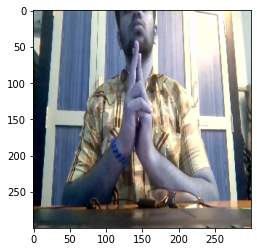

In [4]:
import numpy as np

images = np.asarray(images, dtype=np.float32)
labels = np.asarray(labels, dtype=np.int8)
s = np.arange(images.shape[0])
np.random.shuffle(s)

images = images[s]
labels = labels[s]


plt.imshow(images[1867].astype('uint8'))

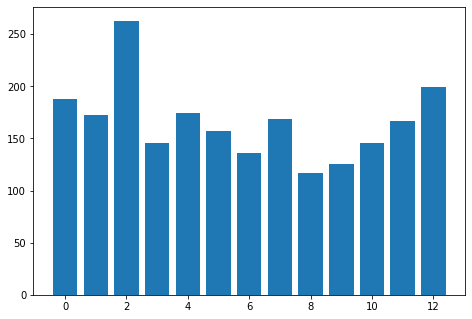

In [5]:
classes,freq = np.unique(labels, return_counts=True)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(classes, freq)
plt.show()
# print(classes, freq, sep='\n')

In [6]:
import keras
from keras.layers import Input, Dense, Conv2D, Dropout, Flatten, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img
from keras.models import Model, Sequential
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

images = images/255
labels = to_categorical(labels)


Using TensorFlow backend.


In [7]:
batch_size = 32
epochs = 20
target_size = (300, 300, 3)

In [8]:
train_imgs, test_imgs, train_y, test_y = train_test_split(images, labels, test_size=0.2, shuffle=True)

print(train_imgs.shape, test_imgs.shape)
print(train_y.shape, test_y.shape)


(1727, 300, 300, 3) (432, 300, 300, 3)
(1727, 13) (432, 13)


In [9]:
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs["val_accuracy"] > 0.99:
      print(f'Reached {logs["accuracy"] * 100}%  validation accuracy. Stopped training')
      self.model.stop_training = True

callback = myCallback()

In [10]:
model = Sequential()
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(2, 2), input_shape=target_size, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(2, 2), padding='valid', activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(2, 2), activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(13, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 256)     7168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 74, 74, 256)       590080    
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 36, 128)       295040    
_________________________________________________________________
dropout_2 (Dropout)          (None, 36, 36, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 165888)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 13)               

In [11]:
history = model.fit(train_imgs, train_y, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks=[callback])

Train on 1381 samples, validate on 346 samples
Epoch 1/20
1381/1381 [==============================] - 15s 11ms/step - loss: 1.9464 - accuracy: 0.4084 - val_loss: 0.7179 - val_accuracy: 0.7890
Epoch 2/20
1381/1381 [==============================] - 7s 5ms/step - loss: 0.5682 - accuracy: 0.8277 - val_loss: 0.4717 - val_accuracy: 0.8699
Epoch 3/20
1381/1381 [==============================] - 7s 5ms/step - loss: 0.3818 - accuracy: 0.8921 - val_loss: 0.4078 - val_accuracy: 0.8931
Epoch 4/20
1381/1381 [==============================] - 7s 5ms/step - loss: 0.2270 - accuracy: 0.9363 - val_loss: 0.2736 - val_accuracy: 0.9249
Epoch 5/20
1381/1381 [==============================] - 7s 5ms/step - loss: 0.0918 - accuracy: 0.9732 - val_loss: 0.2980 - val_accuracy: 0.9220
Epoch 6/20
1381/1381 [==============================] - 7s 5ms/step - loss: 0.0464 - accuracy: 0.9855 - val_loss: 0.2544 - val_accuracy: 0.9393
Epoch 7/20
1381/1381 [==============================] - 7s 5ms/step - loss: 0.0276 - ac

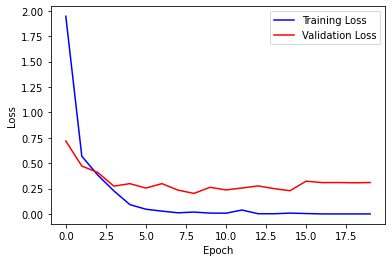

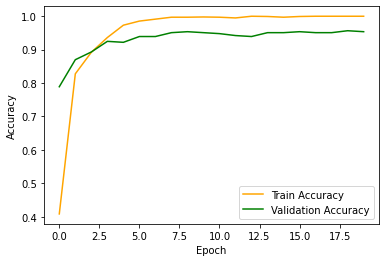

In [12]:
plot1 = plt.figure(1)
plt.plot(history.history['loss'], color='blue', label='Training Loss')
plt.plot(history.history['val_loss'], color='red', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plot2 = plt.figure(2)
plt.plot(history.history['accuracy'], color='orange', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='green', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [13]:
y_pred = model.predict(test_imgs)
y_hat = y_pred
y_real = test_y
y_pred = np.argmax(y_pred, axis=1)
test_y = np.argmax(test_y, axis=1)

print(y_pred.shape)
print(test_y.shape)


(432,)
(432,)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(432, 13) (432, 13)


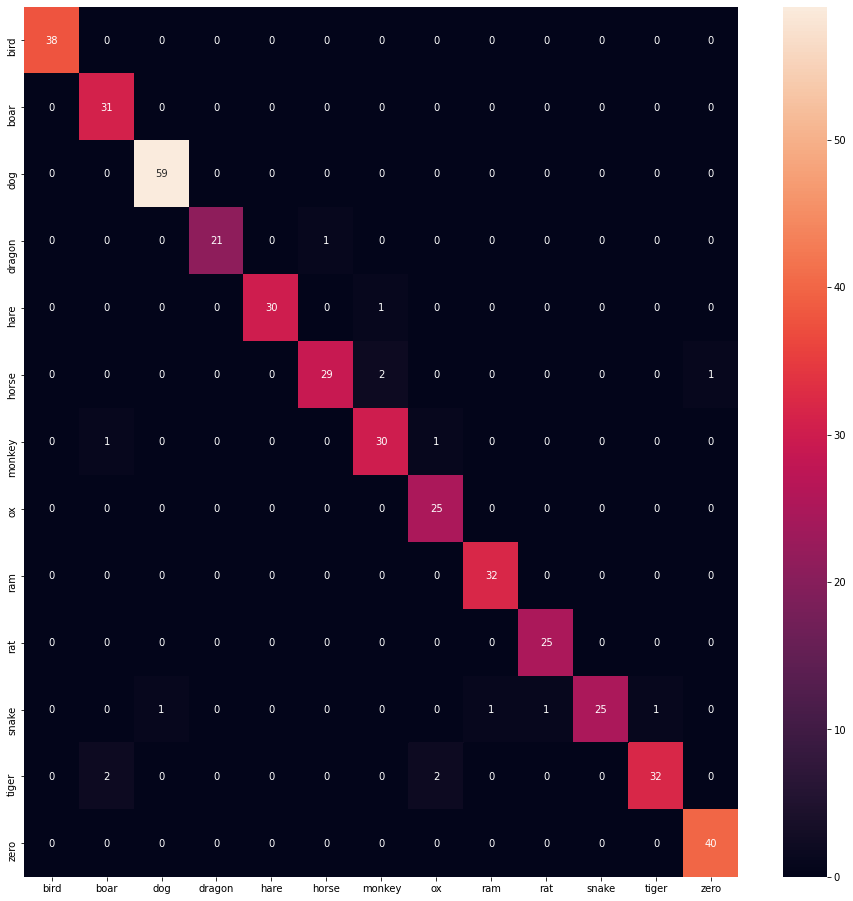

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize = (16,16))
print(y_hat.shape, y_real.shape)
confusion = confusion_matrix(y_pred, test_y)

ax = sns.heatmap(confusion, annot=True)
ax.set_xticklabels(labels_dict.keys())
ax.set_yticklabels(labels_dict.keys())
plt.show()

In [15]:
correct = np.sum(y_pred == test_y)
acc = (correct/test_y.shape[0]) * 100
print(f'Accuracy: {acc:.2f}')

Accuracy: 96.53


In [16]:
model.save('/content/drive/My Drive/DCGAN/best_model_96_test.h5')

In [31]:
from google.colab import files
files.upload()

Saving drag.jpeg to drag.jpeg


{'drag.jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x13\x13\x12\x15\x12\x12\x12\x12\x15\x15\x15\x15\x16\x15\x15\x10\x15\x15\x15\x10\x15\x15\x12\x15\x17\x16\x17\x18\x12\x15\x15\x18\x1d( \x18\x1a%\x1b\x15\x15!1!%)+...\x17\x1f383,7(-.+\x01\n\n\n\x0e\r\x0e\x1a\x10\x10\x1a+\x1d\x1d%------+--+----------------------7---------7---++++\xff\xc0\x00\x11\x08\x00\xc2\x01\x03\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x04\x05\x06\x01\x07\x08\xff\xc4\x00=\x10\x00\x01\x03\x02\x03\x04\x08\x03\x06\x06\x02\x03\x01\x00\x00\x00\x01\x00\x02\x03\x04\x11\x05\x12!\x061AQ\x13"2aq\x81\x91\xb1\x07R\xa1\x14Bb\x92\xc1\xd1#$3r\xe1\xf0\x16\xb2C\xc2\xd2\x15\xff\xc4\x00\x19\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x03\x04\x02\x05\xff\xc4\x00"\x11\x00\x02\x02\x02\x03\x00\x02\x03\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x11\x03!\x121

{'bird': 0, 'boar': 1, 'dog': 2, 'dragon': 3, 'hare': 4, 'horse': 5, 'monkey': 6, 'ox': 7, 'ram': 8, 'rat': 9, 'snake': 10, 'tiger': 11, 'zero': 12}
[4]


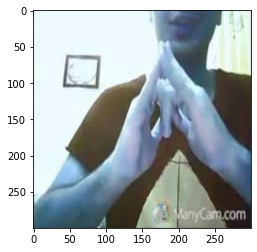

In [36]:
def infer(img_name):
  img = cv2.imread(img_name)
  img = cv2.resize(img, (300, 300), cv2.INTER_AREA)
  img = np.expand_dims(img, axis=0) 
  pred = model.predict(img)
  pred = np.argmax(pred, axis=1)
  plt.imshow(img[0].astype('uint8'))
  print(labels_dict)
  print(pred)

infer('/content/drag.jpeg')